In [26]:

# Load necessary Libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import itertools
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
#predefine plotting styles
plt.style.use("fivethirtyeight")
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'
#it groups together all families and predefine all the settigs for plots


In [15]:
# read the data files
df=pd.read_csv("C:/Users/Preeti Singla/Downloads/tsfdataset/aus_original.csv")
df.head()

,Year,Passengers
0,01/01/1985,33
1,01/01/1986,35
2,01/01/1987,37
3,01/01/1988,41
4,01/01/1989,33


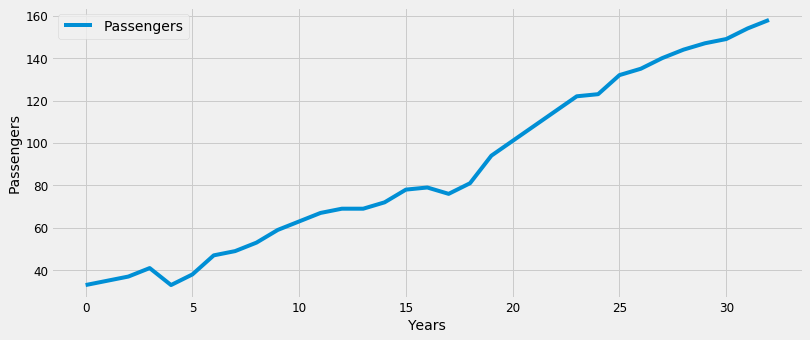

In [16]:
# Plot the time-series
df.plot(figsize=(12,5))
plt.xlabel('Years')
plt.ylabel('Passengers')
plt.show()

#inference: no seasonality or trend
#TSF cant be used
#applying HOLTS

In [17]:
type(df['Year'][0])

str

In [18]:
#month column is not readable in the required format, we convert
df['Year']=pd.to_datetime(df['Year'])
df['Year'].head()

#data is now set up for plotting

0   1985-01-01
1   1986-01-01
2   1987-01-01
3   1988-01-01
4   1989-01-01
Name: Year, dtype: datetime64[ns]

In [23]:
# Creating training and test data
train=df[:28]
test=df[28:]


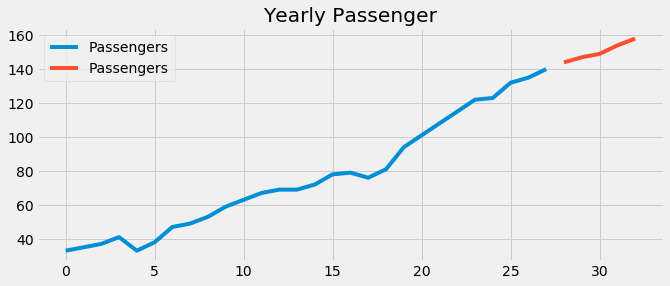

In [24]:
#Plotting train and test data
train.Passengers.plot(figsize=(10,4),title='Yearly Passenger', fontsize=14)
test.Passengers.plot(figsize=(10,4),title='Yearly Passenger', fontsize=14)
plt.legend(loc='best')
plt.show()

In [27]:
#Double Exponential
#Holts

pred=test.copy()
model=Holt(np.asarray(train['Passengers'])).fit(optimized=True)
pred['Holt_linear']=model.forecast(len(test))

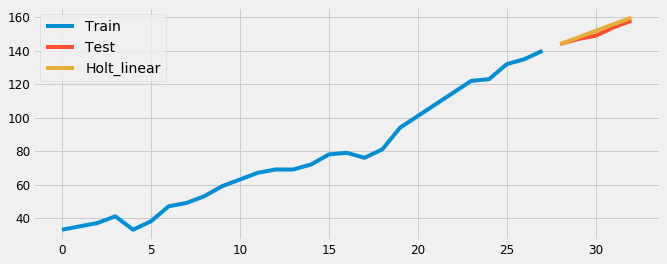

In [28]:
#plotting with double exponential forecast
plt.figure(figsize=(10,4))
plt.plot(train.index,train['Passengers'],label="Train")
plt.plot(test.index,test['Passengers'],label="Test")
plt.plot(pred.index,pred['Holt_linear'],label="Holt_linear")
plt.legend(loc='best')
plt.show()


In [30]:
# Computing the Root Mean square Error (RMSE)

print("\nERRORS\n")
rmse_holt = sqrt(mean_squared_error(test.Passengers,pred.Holt_linear))
print("RMSE using Holt Forecasting : ",rmse_holt)


ERRORS

RMSE using Holt Forecasting :  1.7847852302814053
